In [6]:
# Import necessary libraries
import pandas as pd
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from kedro.io import DataCatalog
import seaborn as sns

In [7]:
%reload_ext kedro.ipython

[07/22/24 17:28:22] INFO     Registered line magic '%reload_kedro'                                   ]8;id=523236;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=411931;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=935749;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=666469;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=282836;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=652584;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py#171\171]8;;\
                             /Users/ishwarpawar/Desktop/Assesment/ETL/healthcare-etl-v4.                           
                             To set a different path, run '%reload_kedro <project_root>'                           

[07/22/24 17:28:24] INFO     Kedro project healthcare-etl-v4                                        ]8;id=757471;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=808041;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=383261;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=213653;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py#142\142]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=723597;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=172703;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/ipython/__init__.py#148\148]8;;\

In [8]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [4]:
catalog.list()


[
    'healthcare_master',
    'transformed_symptoms@csv',
    'transformed_symptoms@spark',
    'joined_patients@csv',
    'joined_patients@spark',
    'medications',
    'cleaned_medications@csv',
    'cleaned_medications@spark',
    'symptoms',
    'cleaned_symptoms',
    'patients',
    'cleaned_patients',
    'patient_gender',
    'cleaned_patients_gender',
    'conditions',
    'cleaned_conditions@csv',
    'cleaned_conditions@spark',
    'encounters',
    'cleaned_encounters',
    'cleaned_patients_parquet',
    'parameters',
    'params:primary_key',
    'params:great_expectations_context_path',
    'params:snowflake_config',
    'params:snowflake_config.sfURL',
    'params:snowflake_config.sfDatabase',
    'params:snowflake_config.sfSchema',
    'params:snowflake_config.sfWarehouse',
    'params:snowflake_config.sfRole',
    'params:snowflake_config.sfUser',
    'params:snowflake_config.sfPassword'
]

In [5]:
# Load datasets
patients_df = catalog.load("patients")
healthcare_master_df = catalog.load("healthcare_master")

                    INFO     Loading data from patients (CSVDataset)...                         ]8;id=959278;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=1827;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py#508\508]8;;\

                    INFO     Loading data from healthcare_master (SparkDataset)...              ]8;id=582617;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=859479;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py#508\508]8;;\

In [17]:
# Get the column names
column_names = healthcare_master_df.columns
print(column_names)

['patient_id', 'birth_date', 'social_security_number', 'driversLicense', 'passport', 'prefix', 'first_name', 'last_name', 'suffix', 'maiden_name', 'marital_status', 'race', 'ethnicity', 'birthPlace', 'address', 'city', 'state', 'county', 'Fips', 'zip_code', 'latitude', 'longitude', 'healthcare_expenses', 'healthcare_coverage', 'income', 'age', 'GENDER', 'pathology', 'num_symptoms', 'Rash_symptoms', 'joint_pain_symptoms', 'fatigue_symptoms', 'fever_symptoms', 'recorded_date', 'resolved_date', 'encounter_id_fk', 'source_code', 'source_description', 'prescribing_date', 'dispensing_date', 'payer_id', 'encounter_id_fkm', 'medication_code', 'medication_description', 'base_cost', 'payer_coverage', 'dispenses', 'total_cost', 'reason_code', 'reason_description', 'encounter_id', 'encounter_start_date', 'encounter_end_date', 'organization', 'provider', 'payer', 'encounter_type', 'code', 'description', 'paid_amount', 'allowed_amount', 'charge_amount', 'admit_source_code', 'admit_source_description

**1. How many distinct patients are in the dataset?**

In [10]:
# Number of distinct patients
distinct_patients_count = healthcare_master_df.select("patient_id").distinct().count()

print(f"Number of distinct patients: {distinct_patients_count}")


Number of distinct patients: 9710


Plot the distinct medications over time using a Python plotting library.
Assuming start_date_m represents the medication start date:

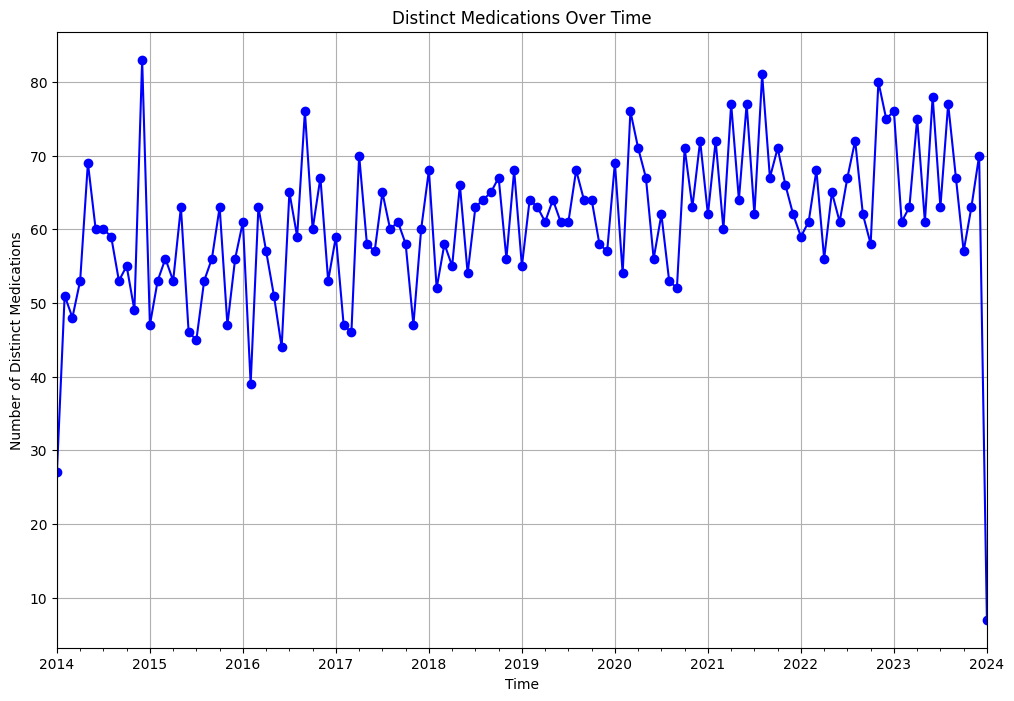

In [18]:
medications_df = healthcare_master_df.select("prescribing_date", "patient_id").dropDuplicates().toPandas()

# Convert start_date_m to datetime
medications_df["start_date_m"] = pd.to_datetime(medications_df["prescribing_date"])

# Plot the distinct medications over time
plt.figure(figsize=(12, 8))
medications_df.groupby(medications_df["prescribing_date"].dt.to_period("M")).size().plot(kind='line', marker='o', linestyle='-', color='b')
plt.title("Distinct Medications Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Distinct Medications")
plt.grid(True)
plt.show()

3. Create a pie chart indicating the percentage of patients across each racial category and gender.
To create the pie chart,first need to get the counts for each racial category and gender, then use a plotting library like Matplotlib.

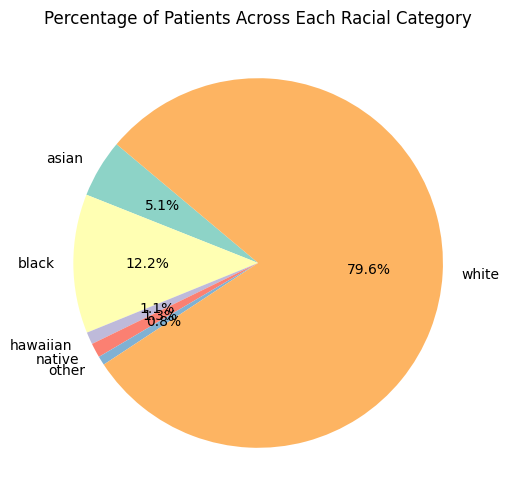

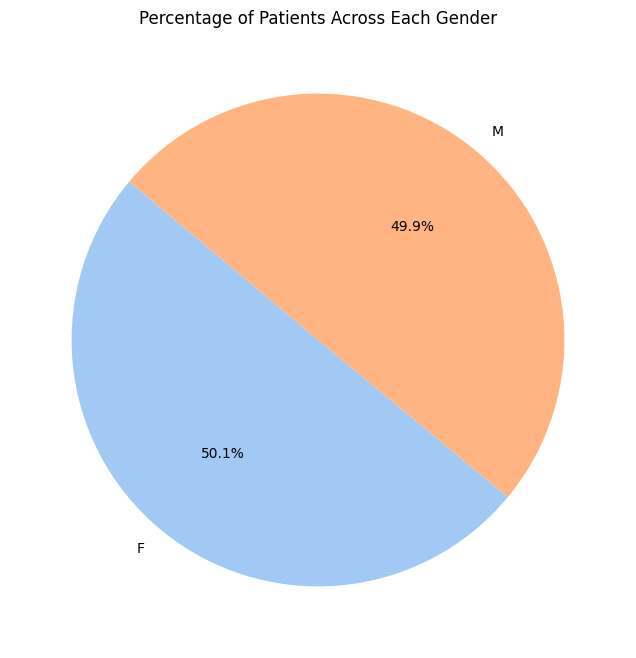

In [10]:
import matplotlib.pyplot as plt

# Get counts for each racial category and gender
race_gender_counts = healthcare_master_df.groupBy("Race", "GENDER").count().toPandas()

# Plot the pie chart for racial categories
race_counts = race_gender_counts.groupby("Race")["count"].sum()

# Pie chart for racial categories
race_counts = race_gender_counts.groupby("Race")["count"].sum()
plt.figure(figsize=(10, 6))
race_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Percentage of Patients Across Each Racial Category")
plt.ylabel('')
plt.show()

# Pie chart for gender
gender_counts = race_gender_counts.groupby("GENDER")["count"].sum()
plt.figure(figsize=(8, 8))
gender_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Percentage of Patients Across Each Gender")
plt.ylabel('')
plt.show()

What percentage of patients have all 4 symptom categories ≥ 30?
First, let's see how the num_symptoms column looks like, then filter based on the symptom categories and calculate the percentage.

In [24]:
# Filter patients with all 4 symptom categories ≥ 30
filtered_patients_df = healthcare_master_df.filter(
    (healthcare_master_df.Rash_symptoms >= 30) & 
    (healthcare_master_df.joint_pain_symptoms >= 30) &
    (healthcare_master_df.fatigue_symptoms >= 30) &
    (healthcare_master_df.fever_symptoms >= 30)
)
# Calculate the percentage
filtered_patients_count = filtered_patients_df.select("patient_id").distinct().count()
percentage = (filtered_patients_count / distinct_patients_count) * 100
print(percentage)
print(f"Percentage of patients with all 4 symptom categories ≥ 30: {percentage:.2f}%")


0.0
Percentage of patients with all 4 symptom categories ≥ 30: 0.00%
